In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS


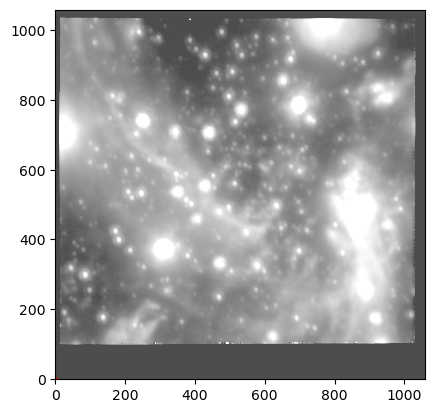

In [2]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20130425nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [3]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20130425nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1059
1059
The FITS image contains 1121481 pixels.


In [4]:
filename =  '/users/ava/Desktop/research/lis/m20130425nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.314558  2013.315   441.73401   704.81799       23.80       1.00        36   42091900.000

      irs16NW   8.681558  2013.315   533.55902   770.17200       23.80       1.00        36   30006500.000

      irs16CC   9.219558  2013.315   345.06100   708.57501       23.80       1.00        36   18282400.000

       star_1   5.812558  2013.315   772.21698  1030.47998       23.80       0.86         0  421782016.000

       star_2   6.336558  2013.315    17.83480   710.84497       23.80       0.67        15  260300000.000

       irs29N   6.568558  2013.315   698.01300   783.99799       23.80       1.00        36  210170000.000

       star_4   7.159558  2013.315   867.75598   494.42899       23.80       0.94        37  122007000.000

      irs16NE   7.567558  2013.315   251.83600   738.95398       23.80       1.00        37   83780400.000

       star_6   5.801558  2013.315   312.51401   373.51599       23.80       1.00        36  425872992.000

      irs16SW   8.340558  20

5.1570899
5.4329101
4.1160401
6.4739599


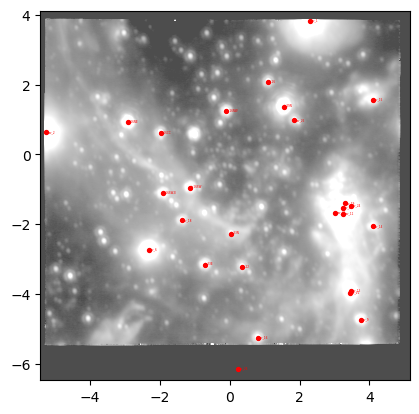

In [5]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1059

x_offset = 1.01557/ 0.01
y_offset = 0.57422/ 0.01

x_pos = 441.73401 + x_offset
y_pos = 704.81799 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20130425nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20130425nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20130425nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()